In [1]:
import tf_keras as tfk
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

2024-08-10 13:49:32.818736: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-10 13:49:32.818893: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-10 13:49:32.970000: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# The Baseball dataset is based on the Baseball statistics which we conclude as below 

As we discuss a few of the data statistics that we consider in the data model we here have a set of explanantions regardng the model data

### 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error

### 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error

### AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

### BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.

### H – Hit: reaching base because of a batted, fair ball without error by the defense

### HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error

### PA/SO – Plate appearances per strikeout: number of times a batter strikes out to their plate appearance

### R – Runs scored: number of times a player crosses home plate


In [2]:
df = pd.read_csv(r"/kaggle/input/test-8-0/baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


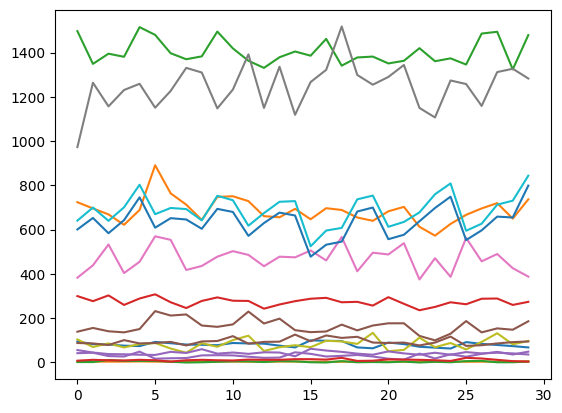

In [3]:
new_df = df.drop('AB', axis = 1)
plt.plot(new_df)

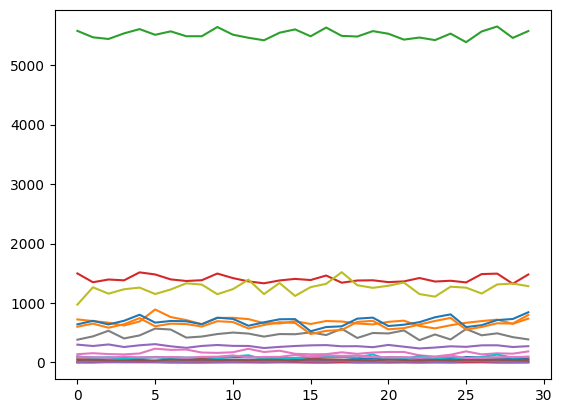

In [4]:
plt.plot(df)

As we observe,  the model consists of very wide range of data. The data here is very noisy considering the range of the data values here. It would important to normalize the data before 

## EDA and Data Normalization

In [66]:
def column_stats(df):
    column_stats = {}
    for col in df.columns:
        column_stats[col] = (df[col].mean(), df[col].std())
    return column_stats

In [5]:
def normalize_values(df):
    column_stats = {}
    for col in df.columns:
        column_stats[col] = (df[col].mean(), df[col].std())

    normalized_df = df.copy()

    for col, (mean, std) in column_stats.items():
        if std != 0:  
            normalized_df[col] = (normalized_df[col] - mean) / std
        else:
            normalized_df[col] = 0 
    return normalized_df

In [6]:
normalized_df = normalize_values(df)
normalized_df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.342459,0.608673,0.833483,1.635722,1.396303,1.023693,-0.774066,-1.509104,-2.652288,0.898523,-0.655036,-0.496620,-0.498434,-0.530733,-0.800936,1.643510,-0.453713
1,0.194513,0.132172,-0.699142,-0.954366,0.125262,1.215037,-0.239866,-0.527573,0.152275,-0.591710,0.163181,0.244746,0.250318,-0.530733,0.169896,0.245679,-0.596991
2,0.003189,-0.327310,-1.096489,-0.149338,1.562091,-0.220046,-0.711219,1.119997,-0.878956,0.109576,-0.668904,-0.738990,-0.630567,2.726039,-0.315520,-0.643849,-1.098464
3,-0.475122,-1.127150,0.237462,-0.394347,-0.814203,-0.411391,-0.868336,-1.141030,-0.165768,-0.679371,0.177049,0.102175,0.052119,1.278584,-0.558228,-0.770925,0.477593
4,-0.666446,0.013047,1.259212,1.950733,0.788414,1.693398,-0.396984,-0.247135,0.104087,-0.021915,1.591594,1.570651,1.505580,1.278584,0.169896,-1.025076,-0.596991


as we run the normalization function, we use the basic function of standardization following the *standardization process* from statistics. Using this we will be able to generate a better comparitive visual model to better understand the data quality and function 

In [ ]:
plt.plot(normalized_df)

As we see the data is pretty nosiey in terms data distributions. Lets now try after sorting the data based on target variable 


In [ ]:
normalized_df_asc = normalized_df.sort_values(by="AB", ascending=True)

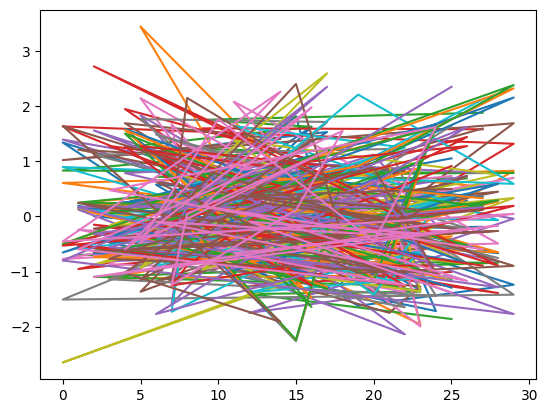

In [9]:
plt.plot(normalized_df_asc)

Again conisdering Wins denoted by W, and sorting them, we unedrstand that the data is vauge and requires manipulations and representations in vivid way, we will start by using different ML models to optimize the process

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_heatmap(df, target_column):

    corr_matrix = df.corr()

    target_correlations = corr_matrix[target_column]

    corr_df = pd.DataFrame({'feature': target_correlations.index,
                          'correlation': target_correlations.values})
    corr_df = corr_df.set_index('feature')

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation with Target')
    plt.show()


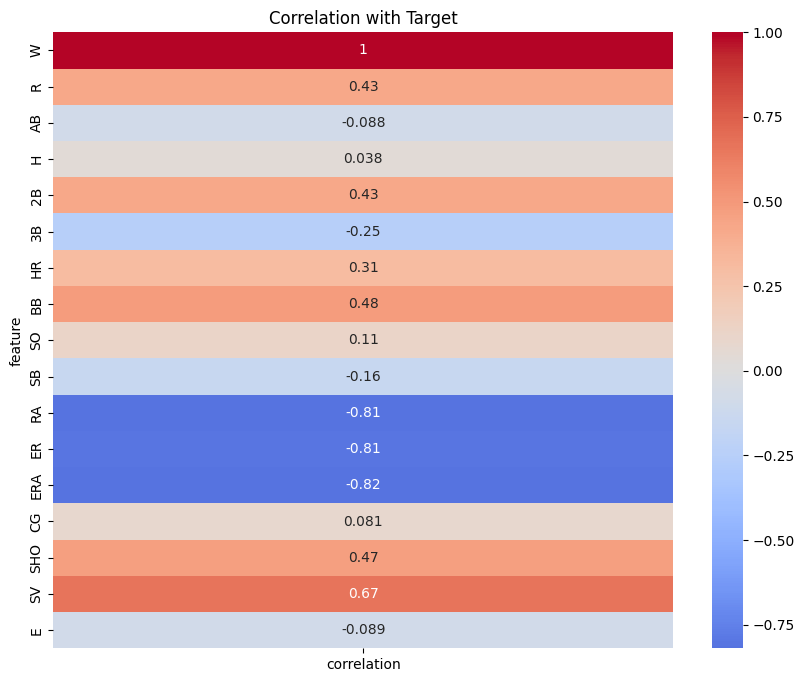

In [11]:
correlation_heatmap(df, 'W')

In [12]:
target = normalized_df[['W']]
values = normalized_df.drop('W', axis = 1)

In [13]:
len(values.columns)

16

In [14]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

def pca(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA()
    pca.fit(X_scaled)

    explained_variance_ratios = pca.explained_variance_ratio_

    X_pca = pca.transform(X_scaled)

    correlations = np.corrcoef(X_pca, y, rowvar=False)[-1, :-1]

    correlation_ranks = np.argsort(abs(correlations))[::-1] + 1

    results = pd.DataFrame({'component': range(1, len(correlations) + 1),
                          'explained_variance_ratio': explained_variance_ratios,
                          'correlation_rank': correlation_ranks})

    return results


In [15]:
result = pca(df, 'W')
result

,component,explained_variance_ratio,correlation_rank
0,1,0.297243,1
1,2,0.184453,2
2,3,0.137727,5
3,4,0.089403,11
4,5,0.078611,14
5,6,0.061273,4
6,7,0.039045,3
7,8,0.030231,13
8,9,0.027115,9
9,10,0.019039,15


In [75]:
X_train, X_test, y_train, y_test = train_test_split(values, target, test_size = 0.2)

In [76]:
X_test
y_test

,W
26,0.290175
12,0.385837
17,1.533783
1,0.194513
7,0.003189
28,-0.666446


In [77]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [78]:
reg_prediction = reg_model.predict(X_test)
reg_prediction

array([[0.13099549],
       [0.21617738],
       [1.29386099],
       [0.54536402],
       [0.12255233],
       [0.19143319]])

In [79]:
mse_reg = mean_squared_error(y_test, reg_prediction)
print("Mean Squared Error:", mse_reg)


Mean Squared Error: 0.16416445751952508


In [80]:

y_test = y_test.reset_index(drop=True)


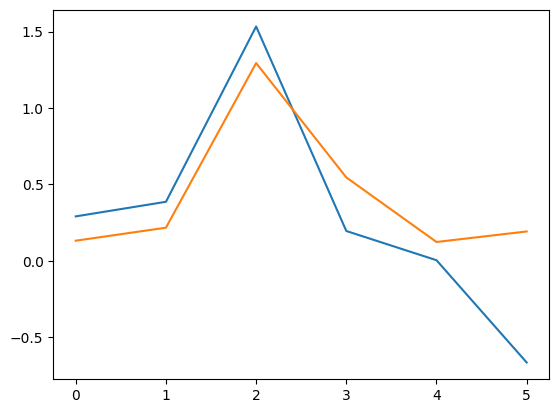

In [81]:
plt.plot(y_test)
plt.plot(reg_prediction)

In [82]:
import tf_keras as tfk
from tf_keras import layers

def create_model():
    model = tfk.Sequential([
    layers.Dense(16, activation='relu', input_shape=(16,)),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) 
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    return model


In [83]:
tf_model = create_model()
tf_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                272       
                                                                 
 dense_19 (Dense)            (None, 32)                544       
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_20 (Dense)            (None, 64)                2112      
                                                                 
 dense_21 (Dense)            (None, 128)               8320      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 256)              

In [84]:
tf_model.fit(X_train, y_train, epochs = 30, batch_size = 15)

Epoch 1/30
2/2 [==============================] - 3s 8ms/step - loss: 1.0532 - accuracy: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 0s 6ms/step - loss: 1.0254 - accuracy: 0.0000e+00
Epoch 3/30
2/2 [==============================] - 0s 7ms/step - loss: 0.9313 - accuracy: 0.0000e+00
Epoch 4/30
2/2 [==============================] - 0s 6ms/step - loss: 0.8587 - accuracy: 0.0000e+00
Epoch 5/30
2/2 [==============================] - 0s 7ms/step - loss: 0.7735 - accuracy: 0.0000e+00
Epoch 6/30
2/2 [==============================] - 0s 6ms/step - loss: 0.7419 - accuracy: 0.0000e+00
Epoch 7/30
2/2 [==============================] - 0s 6ms/step - loss: 0.6333 - accuracy: 0.0000e+00
Epoch 8/30
2/2 [==============================] - 0s 6ms/step - loss: 0.6075 - accuracy: 0.0000e+00
Epoch 9/30
2/2 [==============================] - 0s 6ms/step - loss: 0.5065 - accuracy: 0.0000e+00
Epoch 10/30
2/2 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.0000e+00

In [85]:
tf_prediction = tf_model.predict(X_test)
tf_prediction

1/1 [==============================] - 0s 466ms/step


array([[-0.2762655 ],
       [-0.6911278 ],
       [ 1.2359759 ],
       [-0.32585526],
       [ 0.04350767],
       [-1.0172905 ]], dtype=float32)

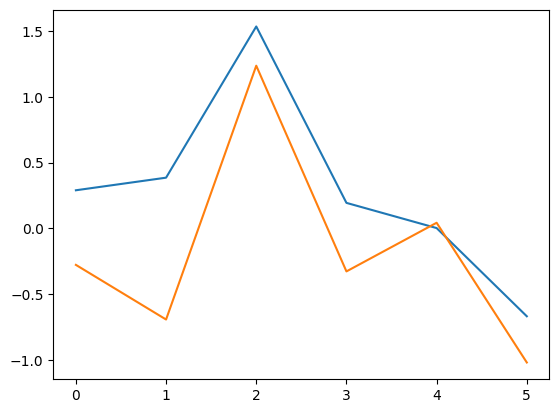

In [86]:
plt.plot(y_test)
plt.plot(tf_prediction)

In [87]:
mse_tf = mean_squared_error(y_test, tf_prediction)
print("Mean Squared Error:", mse_tf)

Mean Squared Error: 0.3274831001563837


We have seen as per the graphing data, the data is not a great fit for the linear data. Still we can once check for a linear Deep Learning Model in case we might be missing some points 

In [88]:
def model_linear():
    model = tfk.Sequential([
    layers.Dense(16, input_shape=(16,)),
    layers.Dense(32,),
    layers.Dropout(0.2),
    layers.Dense(64),
    layers.Dense(128),
    layers.Dropout(0.2),
    layers.Dense(256),
    layers.Dense(128),
    layers.Dense(64),
    layers.Dense(32),
    layers.Dense(1) 
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    return model


In [89]:
lin_model = model_linear()
lin_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                272       
                                                                 
 dense_28 (Dense)            (None, 32)                544       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_29 (Dense)            (None, 64)                2112      
                                                                 
 dense_30 (Dense)            (None, 128)               8320      
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 256)              

In [90]:
lin_model.fit(X_train, y_train, epochs = 30, batch_size = 15)

Epoch 1/30
2/2 [==============================] - 3s 8ms/step - loss: 1.8807 - accuracy: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 0s 7ms/step - loss: 2.0803 - accuracy: 0.0000e+00
Epoch 3/30
2/2 [==============================] - 0s 7ms/step - loss: 0.9696 - accuracy: 0.0000e+00
Epoch 4/30
2/2 [==============================] - 0s 7ms/step - loss: 1.0788 - accuracy: 0.0000e+00
Epoch 5/30
2/2 [==============================] - 0s 7ms/step - loss: 0.9399 - accuracy: 0.0000e+00
Epoch 6/30
2/2 [==============================] - 0s 7ms/step - loss: 0.6396 - accuracy: 0.0000e+00
Epoch 7/30
2/2 [==============================] - 0s 7ms/step - loss: 0.5889 - accuracy: 0.0000e+00
Epoch 8/30
2/2 [==============================] - 0s 7ms/step - loss: 0.7717 - accuracy: 0.0000e+00
Epoch 9/30
2/2 [==============================] - 0s 7ms/step - loss: 0.4994 - accuracy: 0.0000e+00
Epoch 10/30
2/2 [==============================] - 0s 7ms/step - loss: 0.3627 - accuracy: 0.0000e+00

In [91]:
lin_predictions = lin_model.predict(X_test)
lin_predictions

1/1 [==============================] - 0s 446ms/step


array([[ 0.40624887],
       [ 0.0962726 ],
       [ 0.42726904],
       [-0.23013376],
       [ 0.14588551],
       [-0.89137167]], dtype=float32)

In [43]:
mse_lin = mean_squared_error(y_test, lin_predictions)
print("Mean Squared Error:", mse_lin)


Mean Squared Error: 0.2865426048949859


In [44]:
mse = [mse_reg, mse_tf, mse_lin]
index = ["Regression", "DeepLearning", "Linear Deeplearning"]

<BarContainer object of 3 artists>

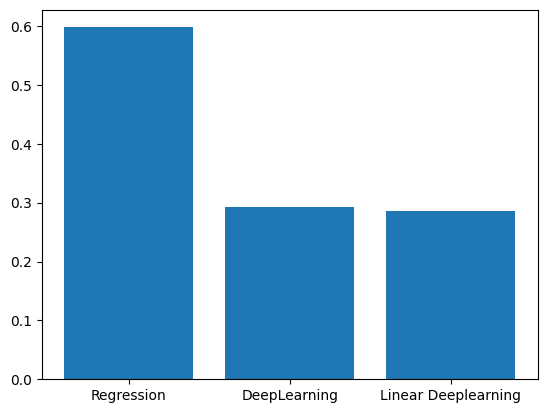

In [47]:
plt.bar(index, mse)

### As we can see with a comparitive study plot, the regression model gives and MSE of almost 0.59, which in this case is greatly higher than its counterparts, DeepLearning model and the Deep Learning Linear model. Thus we eliminate the possibility of using Regression Model as out fianl point
### But there is a major output descrepency here, We have been working and developing the model solely usinng the normalized data which lies in range -3 to positive 3. thus we can use the model files to further test th models on the original data 

In [52]:
df.head() #with original Data 

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [55]:
df_target = df[['W']]
df_values = df.drop('W',axis = 1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df_values, df_target, test_size = 0.2, random_state = 42)

In [58]:
reg_model_plain = LinearRegression()
reg_model_plain.fit(X_train, y_train)

LinearRegression()

In [59]:
norm_predictions = reg_model_plain.predict(X_test)
norm_predictions

array([[ 82.87055379],
       [101.01861025],
       [ 69.42504558],
       [ 93.71375515],
       [ 91.5547615 ],
       [ 79.20277886]])

In [64]:
y_test = y_test.reset_index(drop = True)

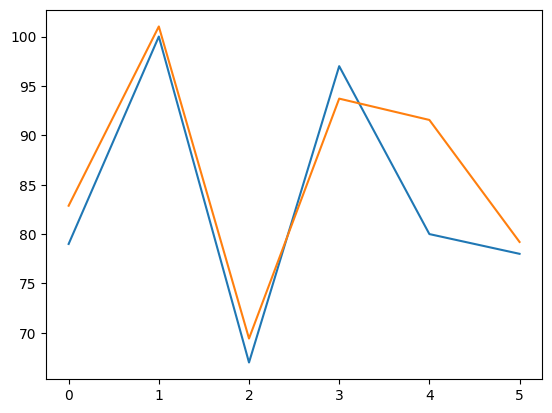

In [65]:
plt.plot(y_test)
plt.plot(norm_predictions)

In [60]:
plain_mse =  mean_squared_error(y_test, norm_predictions)
print("Mean Squared Error:", plain_mse)
## to check again we will bring the predictions data to normal again and check for the values. 

Mean Squared Error: 27.94303250666707


In [68]:
column_values = column_stats(df)
print(column_values)

{'W': (80.96666666666667, 10.45345457940475), 'R': (688.2333333333333, 58.76175353204599), 'AB': (5516.266666666666, 70.46737241243386), 'H': (1403.5333333333333, 57.140922791562126), '2B': (274.73333333333335, 18.095404890770464), '3B': (31.3, 10.452354956560317), 'HR': (163.63333333333333, 31.823308886816708), 'BB': (469.1, 57.0537254367048), 'SO': (1248.2, 103.75946986278841), 'SB': (83.5, 22.815224801842753), 'RA': (688.2333333333333, 72.10800488029115), 'ER': (635.8333333333334, 70.14078617364844), 'ERA': (3.9563333333333333, 0.45408857812282527), 'CG': (3.466666666666667, 2.7634727444278155), 'SHO': (11.3, 4.120177431733435), 'SV': (43.06666666666667, 7.8693352185308), 'E': (94.33333333333333, 13.958888734875842)}


In [99]:
win_vals = column_values['W']
def revaluation(alist, win_values = win_vals):
    mean = float(win_vals[0])
    std = float(win_vals[1])
    
    normal_list = []
    
    i = 0
    for i in range(len(alist)):
        reval = (float(alist[i]) * std) + mean
        normal_list.append(reval)
    return normal_list

In [112]:
import numpy as np 
arr =y_test.values.tolist()
arr

[[0.29017520574581745],
 [0.3858373614861969],
 [1.5337832303707504],
 [0.19451305000543803],
 [0.003188738524679134],
 [-0.666446351657977]]

In [118]:
def revaluation_ytest(alist, win_values = win_vals):
    
    arr =alist.to_numpy()
    
    mean = float(win_vals[0])
    std = float(win_vals[1])
    
    normal_list = []
    
    i = 0
    for i in range(len(arr)):
        reval = (float(arr[i]) * std) + mean
        normal_list.append(reval)
    return normal_list

In [119]:
reg_normal = revaluation(reg_prediction)
y_test_normal = revaluation_ytest(y_test)

/tmp/ipykernel_33/798562593.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  reval = (float(alist[i]) * std) + mean
/tmp/ipykernel_33/3360742230.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  reval = (float(arr[i]) * std) + mean


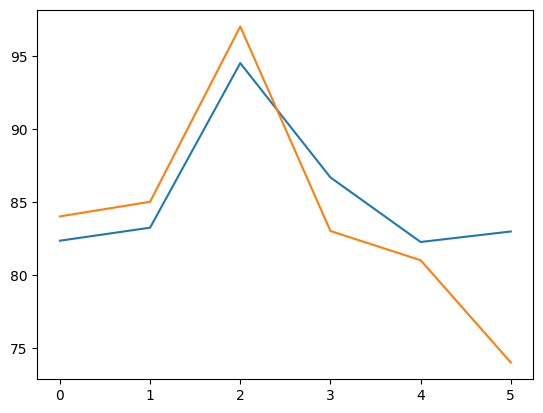

In [120]:
plt.plot(reg_normal)
plt.plot(y_test_normal)

In [125]:
print(mean_squared_error(y_test_normal, reg_normal))
print(plain_mse)

17.93902392175141
27.94303250666707


As we can see the part of Plain MSE which outs as value *27.94303250666707* is greater than that of *17.93902392175141* given by re-instantiated value of regression model which in itself had a lower rating than the deep learning model. Thus this would render the part about suing the data values as it is useless as it would result into more errorenous results. Thus amongst the given we have the best case model as the linear Deep Learning model. Thus we would further go ahead with that model file. 

In [128]:
lin_model.save("/kaggle/working/Baseball predictions")

We further need to add a function to run the model file and also convert the predictions on into the actual prediction values. Also it is important to address, as the model takes into input, the model input come under the column names as the model inputs while training had their weights assigned in the respective manner. Thus is it important that model inputs when addressing in the funtion are addressed cautiously 